## FINAL SUBMISSION PROJECT
Please fill out:

Student name: MIKA BENSON WAMBUA Student pace: Part time Scheduled project review date/time: 13/3/2023 Instructor name: William Okomba Blog post URL:

## OVERVIEW
This repo looks intently on the Aircraft Risk Evaluation by accessing the various aircraft models for either commercial or private enterprises. For instance, some of the key risk factors would include: safety records, maintainance complexity and the historical performance based on the accidents recorded over the years from 1962 - 2023.

## BUSINESS PROBLEM
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase

## THE DATA
The data we were given the following sources:

1. From the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

2. Pulled from Kaggle dataset, here is the link: https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses


## DATA PREPARATION AND CLEANING
# objectives

1. Load files using python built-in packages
2. Look at information about data and column
3. Data cleaning by fixing any missing or incorrect value
4. Ensure wanted observations are well structured.
5. Visualize the dataset
6. Give the Recommendation necessary based on the Business problem.


## step_1. Loading the files using the python built-in packages..

In [1]:
# numpy for high level mathematical functions and working with Arrays
import numpy as np
# pandas data manipulation and analysis for tablular data
import pandas as pd
#seaborn and matplotlib for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import chardet

# Loading the datasets..

The two csv files (comma separated file): AviationData.csv and USState_codes.csv had to be downloaded from Kaggle which came as a zip file. It was necessary to copy the two files and save it on phase1_proj folder.

In [3]:
df = pd.read_csv("USState_codes.csv", index_col = 0)
df.head()

,Abbreviation
US_State,
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
California,CA


In [4]:
df_1 = pd.read_csv('AviationData.csv', encoding='ISO-8859-1', dtype={'column_6_name': str, 'column_7_name': float, 'column_28_name': int})

<ipython-input-4-4622e460246d>:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv('AviationData.csv', encoding='ISO-8859-1', dtype={'column_6_name': str, 'column_7_name': float, 'column_28_name': int})


In [5]:
df_1 = pd.read_csv('AviationData.csv', encoding='ISO-8859-1', low_memory=False)

In [6]:
df_1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Step_2 ..Inspecting the two dataset..

Inspecting of these dataset is a crucial procedure in ensuring the data analysis is accurate through understanding the data structure and the content which ensures correct data types in preparation of the data cleaning process

# Consider the first dataset..

# df (USState_codes.csv)

In [7]:
# To check top 10 rows on the dataset
df.head(10)

,Abbreviation
US_State,
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
California,CA
Colorado,CO
Connecticut,CT
Delaware,DE
Florida,FL


In [8]:
# To check for the columns
df.columns

Index(['Abbreviation'], dtype='object')

In [9]:
# To provide a summary of categorical columns,to understand their distribution, frequency and uniqueness,
# which is important for data analysis and preprocessing.

df.describe(include = "object")

,Abbreviation
count,62
unique,62
top,AL
freq,1


In [10]:
# To check the number of rows and columns respectively

df.shape
print(f"My first dataset has {df.shape[0]} rows and {df.shape[1]} columns")

My first dataset has 62 rows and 1 columns


In [11]:
# Here we provide a summary of the DataFrame, focusing on the number of columns, their data types,
# and memory usage, without listing out every column individually.

df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, Alabama to Pacific ocean
Columns: 1 entries, Abbreviation to Abbreviation
dtypes: object(1)
memory usage: 992.0+ bytes


In [12]:
# To check for any missing values
# for this dataset there are no missing value
df.isna().sum()

Abbreviation    0
dtype: int64

## Consider the second dataset..

# df_1 (AviationData.csv)

In [13]:
# To check the first 10 rows in the dataset

df_1.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [14]:
# To check the number of rows and columns respectively..

df_1.shape

(88889, 31)

In [15]:
print(f"The second dataset contains {df_1.shape[0]} rows and {df_1.shape[1]} columns")

The second dataset contains 88889 rows and 31 columns


In [16]:
# To check the columns 

df_1.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [17]:
# To check the statistical summary for each column..

df_1.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [18]:
# To provide a summary of categorical columns,to understand their distribution, frequency and uniqueness,
# which is important for data analysis and preprocessing.

df_1.describe(include = "object")

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50249,52790,...,88787,81812,32023,12582,82697,16648,84397,61724,82508,75118
unique,87951,2,88863,14782,27758,219,25589,27154,10375,24871,...,2,13,31,3,26,13590,4,12,17075,2924
top,20001212X19172,Accident,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


In [19]:
# To display the data types of each column in the DataFrame..

df_1.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [20]:
"""

The data types tend to line up with what we expect from the dataset. Since the columns 
containing strings are type object, while for the columns containing decimals numbers include (Number.of.Engines,Total.Fatal
Injuries, Total.Serious.Injuries, Total.Uninjured) are type float64

There are also missing NaN values in most of the columns, considering
that there are 88889 rows and in each of the columns listed above seem to have fewer number of 
88889 non-null values.

"""

'\n\nThe data types tend to line up with what we expect from the dataset. Since the columns \ncontaining strings are type object, while for the columns containing decimals numbers include (Number.of.Engines,Total.Fatal\nInjuries, Total.Serious.Injuries, Total.Uninjured) are type float64\n\nThere are also missing NaN values in most of the columns, considering\nthat there are 88889 rows and in each of the columns listed above seem to have fewer number of \n88889 non-null values.\n\n'

In [21]:
# Here we provide a summary of the DataFrame, focusing on the number of columns, their data types,
# and memory usage, without listing out every column individually.

df_1.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Columns: 31 entries, Event.Id to Publication.Date
dtypes: float64(5), object(26)
memory usage: 21.0+ MB


## Step_3.. Data cleaning by fixing any missing or incorrect value

# Data cleaning implies the process of identifying the inconsistencies and inaccuracies in the dataset to ensure seemlessly task when handling data during analysis.

# There are two common methods for dealing with missing values:
1. Removing the data (rows and columns) with the missing values

2. Imputation which refers to the process of filling in the missing values in the dataset with estimated or substituted values



In [22]:
# To check for missing values in the df(USState_codes.csv)
# The firt dataset has no missing values..
df.isnull().any()

Abbreviation    False
dtype: bool

In [23]:
# To check for any missing values
# for this dataset there a number of the missing value
df_1.isna().sum().sort_values(ascending = False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38640
Airport.Name              36099
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7077
Report.Status              6381
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1317
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Investigation.Type            0
Event.Date                    0
Accident.Number               0
Event.Id                      0
dtype: i

In [24]:
# Creating the function that checks for missing values 
def identify_missing_values(df_1): # this creates a function that identify whether the df_1 contains missing values
    """ To check whether the dataframe contains missing values """
    
    missing = [] # initialize an empty list which stores boolean values indicating whether each column in dataframe
                 # has missing values
    
    for i in df_1.isnull().any(): # here we loop through the column to check for missing values 
        missing.append(i)         # the for loop iterates over the boolean values from the return series where each value 
                                  # value in i is appended to the empty list in missing..
            
    missing_set = set(missing)    # here we are converting the missing to set.
    
    
    if (len(missing_set) == 1):  # The function checks the len(missing_set) where each value in the set are either true or 
                                 # false depending on the condition
        print("The dataset has no missing values")
        
    else:
        print("The dataset has missing values")
        
    return  # the function returns the output of the print statements which is None..

identify_missing_values(df_1)


The dataset has missing values


In [25]:
# To check the total number of the null values 
df_1.isnull().sum().sum()

564742

In [26]:
# To check for duplicate values.. 

df_1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Length: 88889, dtype: bool

# Removing columns that are not necessary to the data analysis

In [27]:
df_1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [28]:
df_1.shape

(88889, 31)

In [29]:
# Removing unnecessary columns in the dataframe..
df2 = df_1.drop(columns = ['Accident.Number', 'Schedule','Air.carrier', 'Airport.Code', 'Airport.Name',
                                'FAR.Description', 'Registration.Number','Broad.phase.of.flight',
                          'Publication.Date', 'Longitude', 'Latitude'])
df2.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause


In [30]:
df2.shape

(88889, 20)

In [31]:
df2.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status'],
      dtype='object')

In [32]:
# Filtering the location column..
df2["Abbreviation"] = df2["Location"].str.split(',').str[1].str.strip()
df2["Abbreviation"]

0        ID
1        CA
2        VA
3        CA
4        OH
         ..
88884    MD
88885    NH
88886    AZ
88887    UT
88888    GA
Name: Abbreviation, Length: 88889, dtype: object

In [33]:
# Remove the rows with few missing values..
df2 = df2.dropna(subset = ['Location', 'Make', 'Model', 'Amateur.Built', 'Country', 'Purpose.of.flight', 
                           'Aircraft.damage', 'Report.Status', 'Weather.Condition', 'Abbreviation'])
df2.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Abbreviation
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,ID
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,CA
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause,VA
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,CA
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause,OH


In [34]:
df2.isna().sum().sort_values(ascending = False)

Aircraft.Category         52920
Total.Serious.Injuries    10869
Total.Minor.Injuries      10186
Total.Fatal.Injuries       9861
Total.Uninjured            5163
Number.of.Engines          2100
Engine.Type                1152
Injury.Severity              14
Event.Id                      0
Report.Status                 0
Weather.Condition             0
Purpose.of.flight             0
Amateur.Built                 0
Investigation.Type            0
Model                         0
Make                          0
Aircraft.damage               0
Country                       0
Location                      0
Event.Date                    0
Abbreviation                  0
dtype: int64

In [35]:
# analysis for the Injury.Severity
df2['Injury.Severity'].value_counts()

Non-Fatal     61377
Fatal(1)       5845
Fatal(2)       3541
Fatal          2782
Incident       1124
              ...  
Fatal(54)         1
Fatal(65)         1
Fatal(72)         1
Fatal(160)        1
Fatal(132)        1
Name: Injury.Severity, Length: 78, dtype: int64

In [36]:
df2['Injury.Severity'].value_counts().head()[0]

61377

In [37]:
# Here we try to find the value which appears most frequent in the Injury.Severity column..
df2['Injury.Severity'].value_counts().idxmax()

'Non-Fatal'

In [38]:
# Filling in the missing value in the Injury.Severity column with 'Non_fatal'
df2['Injury.Severity'].fillna('Non_fatal', inplace = True)

In [39]:
df2.isna().sum().sort_values(ascending = False)

Aircraft.Category         52920
Total.Serious.Injuries    10869
Total.Minor.Injuries      10186
Total.Fatal.Injuries       9861
Total.Uninjured            5163
Number.of.Engines          2100
Engine.Type                1152
Event.Id                      0
Report.Status                 0
Weather.Condition             0
Purpose.of.flight             0
Amateur.Built                 0
Investigation.Type            0
Model                         0
Make                          0
Aircraft.damage               0
Injury.Severity               0
Country                       0
Location                      0
Event.Date                    0
Abbreviation                  0
dtype: int64

In [40]:
# Removing missing values in ..Aircraft.Category
df2['Aircraft.Category'].value_counts()

Airplane             21020
Helicopter            2282
Glider                 457
Gyrocraft              150
Weight-Shift           149
Balloon                125
Powered Parachute       84
Ultralight              24
Blimp                    4
Unknown                  2
Powered-Lift             2
WSFT                     1
Name: Aircraft.Category, dtype: int64

In [41]:
df2['Aircraft.Category'].unique()

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'WSFT'], dtype=object)

In [42]:
# filter the data in the Aircraft category to include the values with no missing values..df2 
df2 = df2[~df2['Aircraft.Category'].isna()]
df2.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Abbreviation
7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause,WA
8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,...,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Probable Cause,NJ
12,20020917X02148,Accident,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,...,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,IMC,Probable Cause,LA
13,20020917X02134,Accident,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Airplane,Cessna,R172K,...,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,TX
14,20020917X02119,Accident,1982-01-02,"CHICKASHA, OK",United States,Fatal(1),Destroyed,Airplane,Navion,A,...,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,OK


In [43]:
# Here we filter the dataset to include the rows in Purpose.of.flight column..
df3 = df2[df2['Purpose.of.flight'].isin(['Public Aircraft', 'Public Aircraft - Local', 'Personal', 'Business'])]

In [44]:
df3['Purpose.of.flight'].value_counts()

Personal                   15715
Business                     801
Public Aircraft - Local       56
Public Aircraft               54
Name: Purpose.of.flight, dtype: int64

In [45]:
df3['Purpose.of.flight'].unique()

array(['Personal', 'Business', 'Public Aircraft',
       'Public Aircraft - Local'], dtype=object)

In [46]:
df2 = df3.copy(deep = True)

In [47]:
# Applying multiple aggregation function on the columns below to deal missing value in 
df2[["Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Fatal.Injuries","Total.Uninjured",
                   "Number.of.Engines"]].agg(['sum', 'max', 'median', 'mean'])


,Total.Serious.Injuries,Total.Minor.Injuries,Total.Fatal.Injuries,Total.Uninjured,Number.of.Engines
sum,3793.000000,3227.000000,4959.000000,17711.000000,17053.000000
max,9.000000,10.000000,26.000000,38.000000,8.000000
median,0.000000,0.000000,0.000000,1.000000,1.000000
mean,0.263494,0.219524,0.345166,1.104108,1.051616


In [48]:
df2["Total.Serious.Injuries"].fillna(0, inplace = True)
df2["Total.Minor.Injuries"].fillna(0, inplace = True)
df2["Total.Fatal.Injuries"].fillna(0, inplace = True)
df2["Total.Uninjured"].fillna(0, inplace = True)
df2["Number.of.Engines"].fillna(0, inplace = True)

In [49]:
df2.isna().sum()

Event.Id                    0
Investigation.Type          0
Event.Date                  0
Location                    0
Country                     0
Injury.Severity             0
Aircraft.damage             0
Aircraft.Category           0
Make                        0
Model                       0
Amateur.Built               0
Number.of.Engines           0
Engine.Type               454
Purpose.of.flight           0
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Weather.Condition           0
Report.Status               0
Abbreviation                0
dtype: int64

In [50]:
df2.shape

(16626, 21)

In [51]:
df2["Engine.Type"].value_counts()
# converting the categorical type to list..
mode = df3["Engine.Type"].value_counts().index.tolist()
mode[0]

'Reciprocating'

In [52]:
# Filling the missing value with the most common value which is the Reciprocating..
df2["Engine.Type"].fillna(mode[0], inplace = True)

In [53]:
df2.isna().sum()

Event.Id                  0
Investigation.Type        0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
Abbreviation              0
dtype: int64

## Step 4.. Ensuring the wanted observations are well structured

# Since there are no missing values in the dataset, the next step is to filter the data that is relevant the perform analysis on.

# Here we can either filter the data to include or checking the specific rows in the dataset


In [54]:
# Selecting the country column 
# filtering to have United States as the Country
df3 = df2[df2["Country"] == "United States"]
df3.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Abbreviation
7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause,WA
8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,...,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Probable Cause,NJ
12,20020917X02148,Accident,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,...,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,IMC,Probable Cause,LA
13,20020917X02134,Accident,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Airplane,Cessna,R172K,...,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,TX
14,20020917X02119,Accident,1982-01-02,"CHICKASHA, OK",United States,Fatal(1),Destroyed,Airplane,Navion,A,...,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,OK


In [55]:
df3.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Abbreviation
7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause,WA
8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,...,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Probable Cause,NJ
12,20020917X02148,Accident,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,...,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,IMC,Probable Cause,LA
13,20020917X02134,Accident,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Airplane,Cessna,R172K,...,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,TX
14,20020917X02119,Accident,1982-01-02,"CHICKASHA, OK",United States,Fatal(1),Destroyed,Airplane,Navion,A,...,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,OK


In [56]:
df3.shape

(16527, 21)

In [57]:
# Convert Event.Date from object to datetime
df3 = df3.copy()
df3['Event.Date'] = pd.to_datetime(df3['Event.Date'])

In [58]:
# The Event.Date has been converted to datetime64[ns] datatype..
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16527 entries, 7 to 88767
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                16527 non-null  object        
 1   Investigation.Type      16527 non-null  object        
 2   Event.Date              16527 non-null  datetime64[ns]
 3   Location                16527 non-null  object        
 4   Country                 16527 non-null  object        
 5   Injury.Severity         16527 non-null  object        
 6   Aircraft.damage         16527 non-null  object        
 7   Aircraft.Category       16527 non-null  object        
 8   Make                    16527 non-null  object        
 9   Model                   16527 non-null  object        
 10  Amateur.Built           16527 non-null  object        
 11  Number.of.Engines       16527 non-null  float64       
 12  Engine.Type             16527 non-null  object

In [59]:
# Extract the year
df3['Event.Year'] = df3['Event.Date'].dt.year

In [60]:
df3.head(4)

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Abbreviation,Event.Year
7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,...,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause,WA,1982
8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,...,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Probable Cause,NJ,1982
12,20020917X02148,Accident,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,...,Reciprocating,Personal,0.0,0.0,1.0,0.0,IMC,Probable Cause,LA,1982
13,20020917X02134,Accident,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Airplane,Cessna,R172K,...,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,TX,1982


In [61]:
# Analysis for the Investigation.Type...
df3["Investigation.Type"].value_counts()

Accident    16427
Incident      100
Name: Investigation.Type, dtype: int64

In [62]:
df3.groupby("Investigation.Type").sum()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Year
Investigation.Type,,,,,,
Accident,16884.0,4759.0,3766.0,3191.0,17402.0,32990957
Incident,126.0,0.0,3.0,2.0,244.0,200321


In [63]:
# To group the dataframe by the values in the Investigation.Type column then compute the sum of the numerical columns
df4 = df3[df3["Investigation.Type"] == "Accident"]
df4.head()


,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Abbreviation,Event.Year
7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,...,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause,WA,1982
8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,...,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Probable Cause,NJ,1982
12,20020917X02148,Accident,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,...,Reciprocating,Personal,0.0,0.0,1.0,0.0,IMC,Probable Cause,LA,1982
13,20020917X02134,Accident,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Airplane,Cessna,R172K,...,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,TX,1982
14,20020917X02119,Accident,1982-01-02,"CHICKASHA, OK",United States,Fatal(1),Destroyed,Airplane,Navion,A,...,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,OK,1982


In [64]:
# Creating the function that checks for missing values 
def identify_missing_values(df4): # this creates a function that identify whether the df4 contains missing values
    """ To check whether the dataframe contains missing values """
    
    missing = [] # initialize an empty list which stores boolean values indicating whether each column in dataframe
                 # has missing values
    
    for i in df4.isnull().any(): # here we loop through the column to check for missing values 
        missing.append(i)         # the for loop iterates over the boolean values from the return series where each value 
                                  # value in i is appended to the empty list in missing..
            
    missing_set = set(missing)    # here we are converting the missing to set.
    
    
    if (len(missing_set) == 1):  # The function checks the len(missing_set) where each value in the set are either true or 
                                 # false depending on the condition
        print("The dataset has no missing values")
        
    else:
        print("The dataset has missing values")
        
    return  # the function returns the output of the print statements which is None..

identify_missing_values(df4)

The dataset has no missing values


## Step 5 .. DATA VISUALIZATION

Here the data has been cleaned with the structures well placed for easy of the Visualization..  

Performing a univariate analysis on the Number.of.Engines..

Plotting the Histogram for Number of Engines to check the distribution


In [65]:
df4["Number.of.Engines"]

7        1.0
8        2.0
12       1.0
13       1.0
14       1.0
        ... 
88638    1.0
88639    1.0
88647    1.0
88661    2.0
88767    1.0
Name: Number.of.Engines, Length: 16427, dtype: float64

In [66]:
# Here .astype(int) performs a data type conversion for the 'Number.of.Engines' column in the df4 DataFrame.
df4 = df3.copy()
df4['Number.of.Engines'] = df4['Number.of.Engines']. astype(int)
df4['Number.of.Engines']

7        1
8        2
12       1
13       1
14       1
        ..
88638    1
88639    1
88647    1
88661    2
88767    1
Name: Number.of.Engines, Length: 16527, dtype: int32

In [67]:
df4.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Abbreviation,Event.Year
7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,...,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause,WA,1982
8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,...,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Probable Cause,NJ,1982
12,20020917X02148,Accident,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,...,Reciprocating,Personal,0.0,0.0,1.0,0.0,IMC,Probable Cause,LA,1982
13,20020917X02134,Accident,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Airplane,Cessna,R172K,...,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,TX,1982
14,20020917X02119,Accident,1982-01-02,"CHICKASHA, OK",United States,Fatal(1),Destroyed,Airplane,Navion,A,...,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,OK,1982


In [68]:
df4['Number.of.Engines'].value_counts()

1    14764
2     1113
0      646
4        3
8        1
Name: Number.of.Engines, dtype: int64

In [69]:
df4['Number.of.Engines'].unique()

array([1, 2, 0, 4, 8])

# What's the Distribution of Number of Engines..

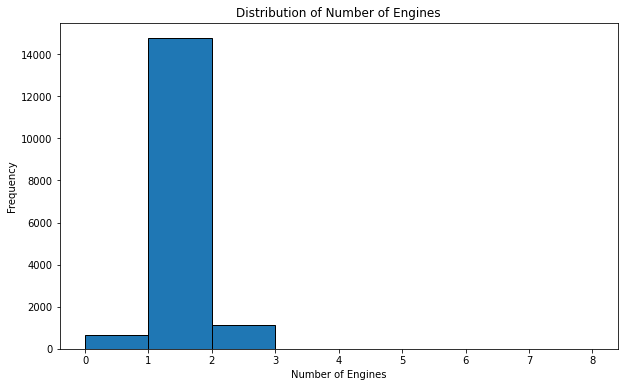

In [70]:
import matplotlib.pyplot as plt

# To ensure that the column is in integer format
df4['Number.of.Engines'] = df4['Number.of.Engines'].astype(int)

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df4['Number.of.Engines'], bins=range(df4['Number.of.Engines'].min(), df4['Number.of.Engines'].max() + 1), edgecolor='black')

# Customize the plot
plt.title('Distribution of Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Frequency')
plt.xticks(range(df4['Number.of.Engines'].min(), df4['Number.of.Engines'].max() + 1))

# Show the plot
plt.show()

The histogram has one peak which means that most of the planes tend to have similar value for the Number.of.Engines..
for the plane with one engine it has the highest peak which further means that its the most common number of engines..

From the graph its evident that most of the Airplanes engines fall from the range 0.0 - 3.0. I have also observed that from
the range there are no probable outliers since these engines numbers fall within the specified range ..

From the analysis its noted that most of the Airplanes have fewer engines with exception of but few which might be having 
significantly more number of engines..


RECOMMENDATIONS...
For the company i would recommend that we purchase the Airplanes with few Number of Engines since 
they have shown significant number of Airplanes considering them for both Private and Commercial enterprises

In [71]:
# Analysis of the Make feature.
df4["Make"].value_counts()

CESSNA             2563
Cessna             2097
PIPER              1647
Piper              1198
BEECH               591
                   ... 
Lacour                1
Schulke               1
MONROIG PEDRO J       1
MUFFETT               1
WASZAK ARTHUR B       1
Name: Make, Length: 3544, dtype: int64

In [72]:
# To convert the string to lower case..
df4["Make"].str.lower()

7                 cessna
8                 cessna
12              bellanca
13                cessna
14                navion
              ...       
88638    waszak arthur b
88639             cessna
88647             cessna
88661              beech
88767           luscombe
Name: Make, Length: 16527, dtype: object

In [73]:
# To capitalize the first letter in each row
df4["Make"].str.capitalize()

7                 Cessna
8                 Cessna
12              Bellanca
13                Cessna
14                Navion
              ...       
88638    Waszak arthur b
88639             Cessna
88647             Cessna
88661              Beech
88767           Luscombe
Name: Make, Length: 16527, dtype: object

In [74]:
df4.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Abbreviation,Event.Year
7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,...,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause,WA,1982
8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,...,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Probable Cause,NJ,1982
12,20020917X02148,Accident,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,...,Reciprocating,Personal,0.0,0.0,1.0,0.0,IMC,Probable Cause,LA,1982
13,20020917X02134,Accident,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Airplane,Cessna,R172K,...,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,TX,1982
14,20020917X02119,Accident,1982-01-02,"CHICKASHA, OK",United States,Fatal(1),Destroyed,Airplane,Navion,A,...,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,OK,1982


In [75]:
df4['Make'].unique()

array(['Cessna', 'Bellanca', 'Navion', ..., 'MOSSMAN MICHAEL D',
       'HIBBARD NORMAN E', 'WASZAK ARTHUR B'], dtype=object)

In [76]:
df3['Make']

7                 Cessna
8                 Cessna
12              Bellanca
13                Cessna
14                Navion
              ...       
88638    WASZAK ARTHUR B
88639             CESSNA
88647             CESSNA
88661              BEECH
88767           LUSCOMBE
Name: Make, Length: 16527, dtype: object

In [77]:
# group purpose of flight and make then count the number of flights for each Make..
purpose_df4 = df4.groupby(['Purpose.of.flight', 'Make']).size().reset_index(name = 'Count_of_Flights')
purpose_df4

,Purpose.of.flight,Make,Count_of_Flights
0,Business,AERO COMMANDER,2
1,Business,AERO VODOCHODY,1
2,Business,AEROSPATIALE,2
3,Business,AEROSTAR INTERNATIONAL,1
4,Business,AIR TRACTOR,1
...,...,...,...
3678,Public Aircraft - Local,MD HELICOPTER INC,2
3679,Public Aircraft - Local,Mcdonnell Douglas Helicopter,1
3680,Public Aircraft - Local,Mcdonnell Douglas Helicopters,1
3681,Public Aircraft - Local,PIPER,2


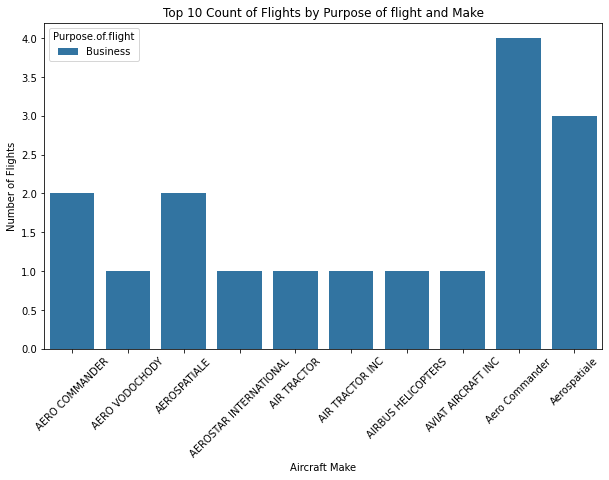

In [78]:
# Creating a barplot visualizaing Number of flights for each make and purpose of flight..
plt.figure(figsize = (10, 6))
sns.barplot (x = 'Make', y = 'Count_of_Flights', hue = 'Purpose.of.flight', data = purpose_df4.head(10))
plt.title('Top 10 Count of Flights by Purpose of flight and Make')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Flights')
plt.xticks(rotation = 45)
plt.show()

From the analysis there is more preference for the Business in the purpose of flight within the top 10 which further 
indicates more demand for the flights in the Business category

For commercial enterprise, my recommendation would be to invest more in Aero Commander make due to its highest 
number of flights recorded..

# Visualizing the Bottom 10 Count of Flights by Purpose of flight and Make

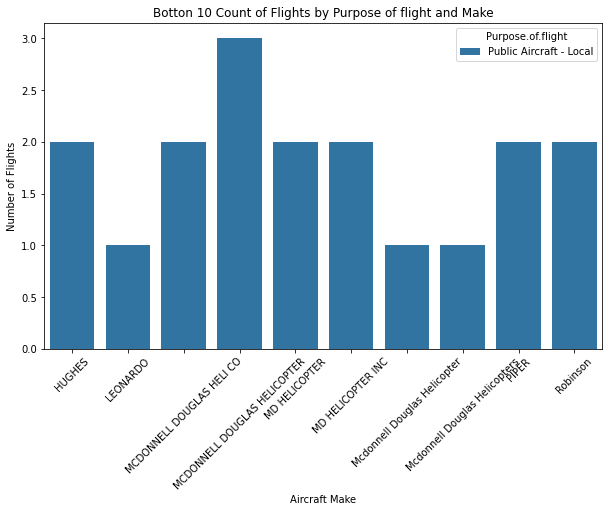

In [79]:
# Creating a barplot visualizaing Number of flights for each make and purpose of flight for the bottom counts of flights..
plt.figure(figsize = (10, 6))
sns.barplot (x = 'Make', y = 'Count_of_Flights', hue = 'Purpose.of.flight', data = purpose_df4.tail(10))
plt.title('Botton 10 Count of Flights by Purpose of flight and Make')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Flights')
plt.xticks(rotation = 45)
plt.show()

From the analysis there is more preference for the Public Aircraft - Local in the purpose of flight within the 
bottom 10 further indicating more demand for the flights in the Public Aircraft.

For commercial enterprise, my recommendation would be to invest more in MCDONNELL DOUGLAS HELI CO make due to its highest 
number of flights recorded..

In [80]:
df4.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Abbreviation,Event.Year
7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,...,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause,WA,1982
8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,...,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Probable Cause,NJ,1982
12,20020917X02148,Accident,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,...,Reciprocating,Personal,0.0,0.0,1.0,0.0,IMC,Probable Cause,LA,1982
13,20020917X02134,Accident,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Airplane,Cessna,R172K,...,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,TX,1982
14,20020917X02119,Accident,1982-01-02,"CHICKASHA, OK",United States,Fatal(1),Destroyed,Airplane,Navion,A,...,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,OK,1982


In [81]:
# To reset the index of the dataframe..
df4 = df4.reset_index()

In [82]:
df4.head()

,index,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Abbreviation,Event.Year
0,7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,...,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause,WA,1982
1,8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,...,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Probable Cause,NJ,1982
2,12,20020917X02148,Accident,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,...,Reciprocating,Personal,0.0,0.0,1.0,0.0,IMC,Probable Cause,LA,1982
3,13,20020917X02134,Accident,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Airplane,Cessna,...,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,TX,1982
4,14,20020917X02119,Accident,1982-01-02,"CHICKASHA, OK",United States,Fatal(1),Destroyed,Airplane,Navion,...,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,OK,1982


In [83]:
# assigning safety weightage
Fatal = 6
Serious = 3
Minor = 1

# calculating safety score..
df4['Safety_Score'] =   (df4['Total.Fatal.Injuries'] * Fatal
                                  + df4['Total.Serious.Injuries'] * Serious
                                  + df4['Total.Minor.Injuries'] * Minor)
df4['Safety_Score']

0        0.0
1        0.0
2        1.0
3        6.0
4        6.0
        ... 
16522    0.0
16523    0.0
16524    0.0
16525    0.0
16526    0.0
Name: Safety_Score, Length: 16527, dtype: float64

In [84]:
df4.head()

,index,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Abbreviation,Event.Year,Safety_Score
0,7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,...,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause,WA,1982,0.0
1,8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,...,Business,0.0,0.0,0.0,2.0,IMC,Probable Cause,NJ,1982,0.0
2,12,20020917X02148,Accident,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,...,Personal,0.0,0.0,1.0,0.0,IMC,Probable Cause,LA,1982,1.0
3,13,20020917X02134,Accident,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Airplane,Cessna,...,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,TX,1982,6.0
4,14,20020917X02119,Accident,1982-01-02,"CHICKASHA, OK",United States,Fatal(1),Destroyed,Airplane,Navion,...,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,OK,1982,6.0


# Determine the correlation between Safety_Score and the Number.of.Engines

A positive correlation value of 0.091696 indicates a moderate positive relationship between the Safety Score and Number of Engines. This means that as the number of engines increases, the safety score tends to increase moderately.

A correlation close to 0 indicates little to no linear relationship.

A value close to 1 indicates a strong positive correlation, while a value close to -1 would indicate a strong negative correlation.

In [85]:
# Find the correlation between 'Safety_Score' and 'Number_of_Engines'
correlation = df4[['Safety_Score', 'Number.of.Engines']].corr()

print(correlation)

                   Safety_Score  Number.of.Engines
Safety_Score           1.000000           0.091696
Number.of.Engines      0.091696           1.000000


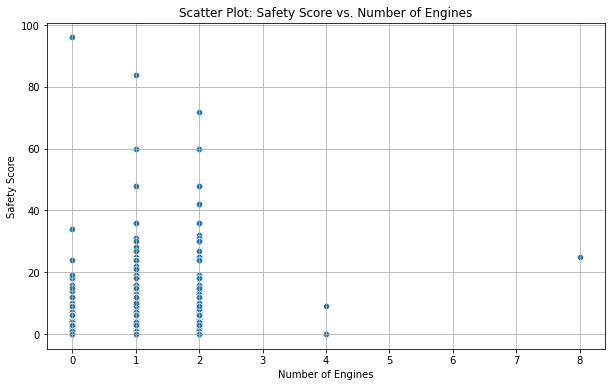

In [86]:
# Creating a scatter plot to determine whether there's any correlation between Number_of.Engines and Safety_Score
plt.figure(figsize=(10, 6))  # Set the figure size

sns.scatterplot(x='Number.of.Engines', y='Safety_Score', data = df4)

# Customize the plot
plt.title('Scatter Plot: Safety Score vs. Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Safety Score')
plt.grid(True)  # Add gridlines for better readability

From my analysis we tend to have a Negative correlation which exit due to the downward trend which further could mean that for the Airplanes with fewer Engines have higher safety score 

RECOMMENDATIONS:
I would suggest we select the Airplanes with fewer Engines since they are more reliable to the safety of our clients.

# Creating visualization for the Distribution of the Safety Score by The Purpose of Flight..

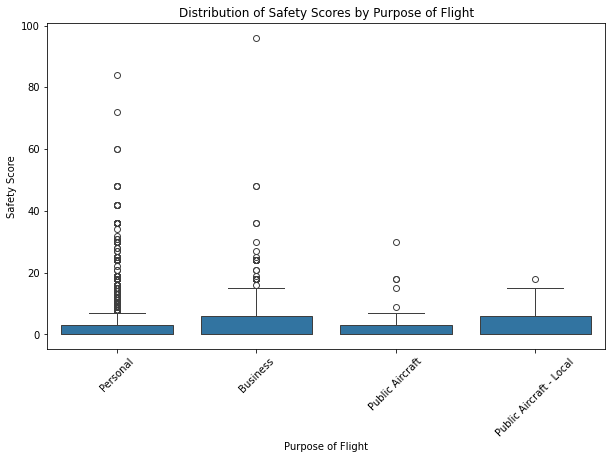

In [87]:
# Creating a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Purpose.of.flight', y='Safety_Score', data = df4)

# Customize the plot
plt.title('Distribution of Safety Scores by Purpose of Flight')
plt.xlabel('Purpose of Flight')
plt.ylabel('Safety Score')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

# Visualizing the Line graph for Safety Score over Event Year

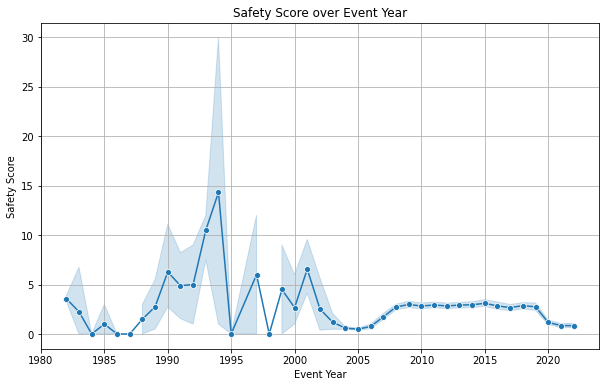

In [88]:
# Creating a Line Plot with Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.lineplot(x='Event.Year', y='Safety_Score', data = df4, marker = 'o')

# Customize the plot
plt.title('Safety Score over Event Year')
plt.xlabel('Event Year')
plt.ylabel('Safety Score')
plt.grid(True)  # Add gridlines for better readability

# Show the plot
plt.show()

From the analysis its observed that there was fluctuations of the safety score over the years and this could indicate that the safety performance is inconsistent.

RECOMMENDATIONS:
I would recommend we perform some investigations of whether some features such as Weather Conditions or even the Make_Model have impacted those specific years.

# Visualizing line plot for Safety Score over the Event Year..

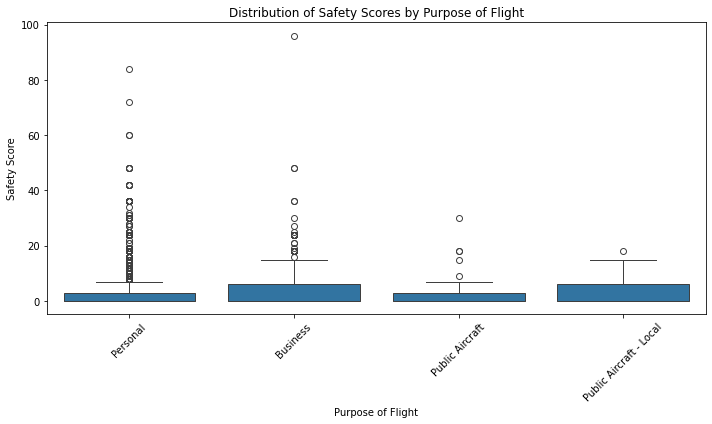

In [113]:
# Creating a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Purpose.of.flight', y='Safety_Score', data = df4)

# Customize the plot
plt.title('Distribution of Safety Scores by Purpose of Flight')
plt.xlabel('Purpose of Flight')
plt.ylabel('Safety Score')
plt.xticks(rotation=45)# Rotate x-axis labels if needed
plt.tight_layout()
# Show the plot
plt.show()

In [90]:
df5 = df4.copy()

In [91]:
df5.head()

,index,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Abbreviation,Event.Year,Safety_Score
0,7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,...,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause,WA,1982,0.0
1,8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,...,Business,0.0,0.0,0.0,2.0,IMC,Probable Cause,NJ,1982,0.0
2,12,20020917X02148,Accident,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,...,Personal,0.0,0.0,1.0,0.0,IMC,Probable Cause,LA,1982,1.0
3,13,20020917X02134,Accident,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Airplane,Cessna,...,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,TX,1982,6.0
4,14,20020917X02119,Accident,1982-01-02,"CHICKASHA, OK",United States,Fatal(1),Destroyed,Airplane,Navion,...,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,OK,1982,6.0


In [92]:
df5.columns

Index(['index', 'Event.Id', 'Investigation.Type', 'Event.Date', 'Location',
       'Country', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status', 'Abbreviation', 'Event.Year', 'Safety_Score'],
      dtype='object')

In [93]:
safe_metrics = df5[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']]

In [94]:
# Grouping data by 'Make' and 'Model' then summing uo with the injury related column..
safe_metrics = df5.groupby(['Make', 'Model']).agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries':'sum',
    'Total.Minor.Injuries': 'sum'
}).reset_index()
safe_metrics

safe_metrics['Safety_Score'] = safe_metrics['Total.Fatal.Injuries'] + safe_metrics['Total.Serious.Injuries'] + safe_metrics['Total.Minor.Injuries']

In [95]:
# sorting by safety_score to find which is the safe Aircraft... considering those with the lowest scores..
safe_aircraft = safe_metrics.sort_values(by = 'Safety_Score', ascending = True)
safe_aircraft.head(10)

,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Safety_Score
1845,Cessna,210C,0.0,0.0,0.0,0.0
2294,Denney,KITFOX MDL CLASSICIV,0.0,0.0,0.0,0.0
2295,Denney,KITFOX SPEEDSTER,0.0,0.0,0.0,0.0
2297,Denny Aerocraft,Kitfox III,0.0,0.0,0.0,0.0
4831,Piper,PA-28-280,0.0,0.0,0.0,0.0
4829,Piper,PA-28-235D,0.0,0.0,0.0,0.0
4826,Piper,PA-28-200R,0.0,0.0,0.0,0.0
2302,Devereux,Mustang II,0.0,0.0,0.0,0.0
2303,Dgflugzeugbau,DG-800S,0.0,0.0,0.0,0.0
2304,Diamond,DA20,0.0,0.0,0.0,0.0


In [96]:
safe_aircraft = safe_metrics.sort_values(by = 'Safety_Score', ascending = True)

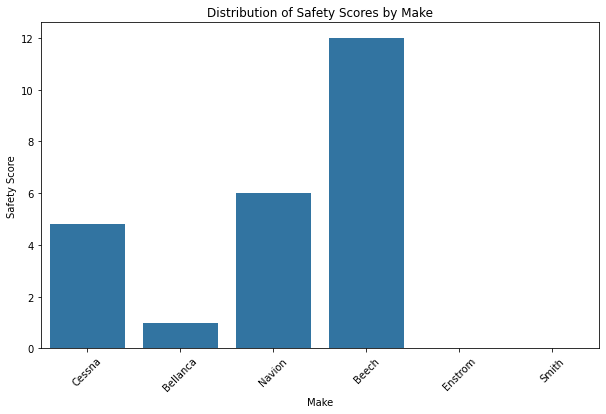

In [97]:
# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Make', y='Safety_Score', data = df5.head(10), errorbar = None)

plt.title('Distribution of Safety Scores by Make')
plt.xlabel('Make')
plt.ylabel('Safety Score')
plt.xticks(rotation=45)  
plt.show()


From the Observation, the Beech make shows the highest bar which further indicates that its Aircraft make has the highest safety score and also they are relatively safer compared to the rest of the Aircraft Makes

RECOMMENDATION: I would recommend we consider the Beech Make which could enhance the ability to provide safety and reliability for the clients in the Private Enterprise

For the Commercial Enterprise, the safety score for beech might attract clients who consider safety as their priority. This would further enhance the reputation of our Company.

# Combining the make and model of the aircraft then visualizing against the Safety_Score..

In [98]:
# Combine 'Make' and 'Model' into a new column 'Make_Model' then do the visuals 

df5['Make_Model'] = df5['Make'] + ' ' + df5['Model']

In [99]:
df5.head()

,index,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Abbreviation,Event.Year,Safety_Score,Make_Model
0,7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,...,0.0,0.0,0.0,2.0,VMC,Probable Cause,WA,1982,0.0,Cessna 140
1,8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,...,0.0,0.0,0.0,2.0,IMC,Probable Cause,NJ,1982,0.0,Cessna 401B
2,12,20020917X02148,Accident,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,...,0.0,0.0,1.0,0.0,IMC,Probable Cause,LA,1982,1.0,Bellanca 17-30A
3,13,20020917X02134,Accident,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Airplane,Cessna,...,1.0,0.0,0.0,0.0,IMC,Probable Cause,TX,1982,6.0,Cessna R172K
4,14,20020917X02119,Accident,1982-01-02,"CHICKASHA, OK",United States,Fatal(1),Destroyed,Airplane,Navion,...,1.0,0.0,0.0,0.0,IMC,Probable Cause,OK,1982,6.0,Navion A


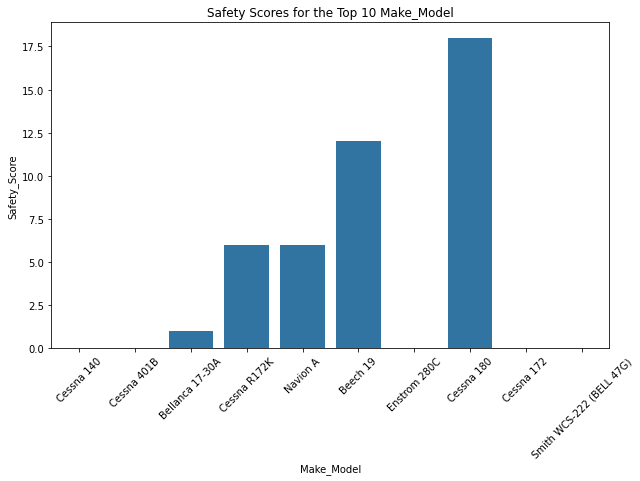

In [100]:
# Creating a Bar plot for visualization
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Make_Model', y = 'Safety_Score', data = df5.head(10))

plt.title('Safety Scores for the Top 10 Make_Model')
plt.xlabel('Make_Model')
plt.ylabel('Safety_Score')
plt.xticks(rotation=45)
plt.show()

# Visualizing the Average Number of Engines By Aircraft Make_Model..

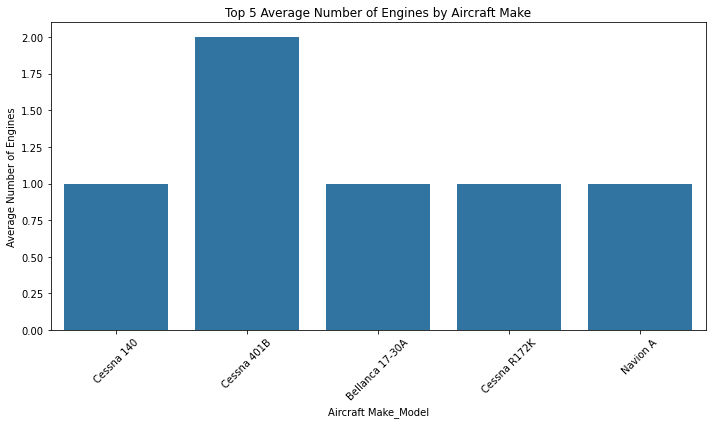

In [101]:
# Creating a bar plot with Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x = 'Make_Model', y = 'Number.of.Engines', data = df5.head(5))

# Customize the plot
plt.title('Top 5 Average Number of Engines by Aircraft Make')
plt.xlabel('Aircraft Make_Model')
plt.ylabel('Average Number of Engines')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.tight_layout()
# Show the plot
plt.show()

Cessna 401B has the highest Average Number of Engines compared to the rest of the Aircraft Make_Model.
Cessna 401B will be ideal for Commercial Enterprise while the rest of the Aircraft Make_Model would be more efficient for 
Private Enterprise

In [102]:
df6 = df5.copy(deep = True)

In [103]:
df6.head()


,index,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Abbreviation,Event.Year,Safety_Score,Make_Model
0,7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,...,0.0,0.0,0.0,2.0,VMC,Probable Cause,WA,1982,0.0,Cessna 140
1,8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,...,0.0,0.0,0.0,2.0,IMC,Probable Cause,NJ,1982,0.0,Cessna 401B
2,12,20020917X02148,Accident,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,...,0.0,0.0,1.0,0.0,IMC,Probable Cause,LA,1982,1.0,Bellanca 17-30A
3,13,20020917X02134,Accident,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Airplane,Cessna,...,1.0,0.0,0.0,0.0,IMC,Probable Cause,TX,1982,6.0,Cessna R172K
4,14,20020917X02119,Accident,1982-01-02,"CHICKASHA, OK",United States,Fatal(1),Destroyed,Airplane,Navion,...,1.0,0.0,0.0,0.0,IMC,Probable Cause,OK,1982,6.0,Navion A


In [104]:
#df = df.reset_index()

In [105]:
df.head()

,Abbreviation
US_State,
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
California,CA


In [106]:
# .merge() .. joins the two DataFrame within their index
df6 = df5.merge(df, on = "Abbreviation")

In [107]:
df6.columns

Index(['index', 'Event.Id', 'Investigation.Type', 'Event.Date', 'Location',
       'Country', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status', 'Abbreviation', 'Event.Year', 'Safety_Score',
       'Make_Model'],
      dtype='object')

In [108]:
# Creating a cleaned csv file...
cleaned_df6 = df6
cleaned_df6.to_csv('cleaned_data3.csv', index = False)

PermissionError: [Errno 13] Permission denied: 'cleaned_data3.csv'

In [ ]:
df5.shape

In [ ]:
df5.head()

In [ ]:
df5.dtypes

# Some of the Areas to study about ...
1. Investigate how the number of engines correlates with other performance factors like speed, range, and payload capacity. This could give you more comprehensive insights into which aircraft make/models provide the best overall performance for specific routes or markets.


In [ ]:
#df1_cleaned = df1.dropna(subset=['Aircraft.Categ])

In [ ]:
#df1_cleaned = df1.dropna(subset=['Aircraft.Category', 'Injury.Severity', 'Location'])

In [ ]:
df1.isnull().sum().sort_values(ascending = False)